
RunModel_IntervalTracks_to_hists_08August2023_HDplusUNet100_pruning01_10epochs-1em4-Copy1

is derived from  RunModel_IntervalTracks_to_hists_08August2023_HDplusUNet100_pruning01_10epochs-1em4

the plan is to repeat the FC layers pruning, but starting from a better trained model that has
lower training and validation costs.

The final costs of 

`RunModel_IntervalTracks_to_hists_02September2023_HDplusUNet100_iter10Ca-alt_lossAA-300epochs-1em4_fullLHCbMC-scrubbed_data_float_all_weights
`
were

`
Epoch 1095: train=0.0328378, val=0.034483, took 83.312 s
Epoch 1096: train=0.0328492, val=0.0345545, took 83.165 s
Epoch 1097: train=0.0328453, val=0.0345373, took 81.217 s
Epoch 1098: train=0.0328744, val=0.0345442, took 82.123 s
Epoch 1099: train=0.0328462, val=0.0345119, took 82.989 s
`

### 

start pruning01 from iter8Ca % remove 5% of weights from layers 2, 3, 4, 5, and 6 based on Sara's observations that these do not degrade the tracks-to-KDE model performance.

----------------------------------------------------

start iter8Ca from iter7Ca and continue for another 125 epochs; same batch size, same learning rate

----------------------------------------------

start iter7Ca where iter^Ca left off, increasing the batch size from 138 to 256 and increasing the number of epochs from 5 to 25.

---------------------------------

iter6Ca created from iter6C; the only differences are the batch size (increasing from 64 to 128), changing gpu(2) to gpu(0), and changing the name of the file where results are stored.

-------------------

iter6C created 07-August-2023 picks up where 

RunModel_IntervalTracks_to_hists_11September2022_HDplusUNet100_iter5C-alt_lossAA-10epochs-1em4_fullLHCbMC-scrubbed_data_float_all_weights

left off.

Its primary purpose is to make sure it still executes as expected, this time running on sneezy. Need to change Kernel to run on sneezy rather than sleepy.

Assuming this works as expected, the next iterations will attempt pruning plus re-training some of the fully connected layers, based on how well this works for the tracks-to-KDE model.

----------------------------------------------



iter5C will pick up where iter4C did "best" (lowest validation cost, near lowest training cost), epoch #7, with with 1e-4 learning rate rather than 1e-3.  A few epochs later, the costs jumped enormously, indicating the weights escaped from the vicinity of a local minimum.

NB:  observed after execution -- the name that was supposed to be "pretrained_dict = " was "oretrained_dict = ", so this really started from the previous iteration, i.e., from iter3C rather than from inter4C.

--------------------------------------------------------

iter4C starts with weights from iter3C and simply continues.  NB:  iter2C ended with training cost about the same as that at the beginning of iter1C; so floating all the weights seems to have increased confusion for a bit; it finished with training cost about where iter1C started;  am hopeful the extra capacity (and more epochs) of this notebook will lead to an even better result.

------------------------------------------------------- 

iter3C starts with weights from iter2C and lets all weights float during learning.

---------------------------------------------------



iter2C starts with the weights from iter1C (weights from from 6 fully connected layers remain frozen) and replace 

  from model.interval_kde_loss_Ba import Loss
  
 with
 
   from model.alt_loss_AA import Loss
   
and use

  loss = Loss(epsilon=1e-5,coefficient=2.5)

Presumably, the subsequent iteration will be run with all weights floated to see what effect that has.
 
 
-------------------------------

iter0C tries to learn tracks_to_hists starting with weights from tracks_to_KDE learning with fully connected layer weights and biases frozen; iter1C continues for another 20 epochs where iter0C left off (weights from from 6 fully connected layers remain frozen as the overall cost remains high).

-----------------------------------


From RunModel_IntervalTracks_to_KDE_27Aug2022_HDplusUNet100_iter1A-testing-50epochs-1em4_fullLHCbMC-scrubbed_data.ipynb, derive

RunModel_IntervalTracks_to_hists_10September2022_HDplusUNet100_iter0B-testing-5epochs-1em4_fullLHCbMC-scrubbed_data

This will read in tracks_to_hists Array datasets rather than tracks_to_KDE data sets that have not been "prepared".

Also, the loss function will be changed to a standard for for target histogram learning.

It will initially use weights from the IntervalTracks_to_KDE learning.  For this variation on the theme (iter0B compared to inter0A), let's freeze the weights from the fully connected layers at the front end.


---------------------------

Derive iter4A from iter#A.  Mostimportant changes -- used "scrubbed" data files in which events with
problematic KDEs have been removed and use 250 tracks per event rather than 150 as the long tail
creates some high-cost intervals.

Derive iter3A from iter2A; NB that collect_t2kde_data in in collectdata_kde_Ellipsoids_aug2022.py has (this morning) been modified to store only kernel info as labels, not xMax or Ymax info

----------------------------------

Derive iter2A from iter1A: RunModel_IntervalTracks_to_KDE_17Aug2022_HalfDozen_iter1A-testing-50epochs-2em5_fullLHCbMC 


Derive iter1 from iter0; start wherre iter0 left off and comment out code tht resets biases when starting


------------------------------
 
 

This is a copy of 

  RunModel_IntervalTracks_to_KDE_08Aug2022_HalfDozen_iter0-testing-50epochs-1em4_repeat
  
modified to use full LHCb MC rather than toy MC.  This requires changing the train_loader and val_loader input file and using a version of collectdata that "scrubs" the poca_ellipsoid data

 -------------------------------------------------

basically, a copy  of 

  RunModel_IntervalTracks_to_KDE_15July_HalfDozen_iter0-testing-50epochs-1em4

to see if those results are reproducible.  The only two changes are

   (i)  use gpu(2) rather than gpu(0)
   (ii) for val_loader, use slice=xxx

In [1]:
##%matplotlib widget
## with %matplotlib notebook: seems to require ipympl as part of environment, either
## part of the conda environment or "pip install ipympl"
## otherwise, does not show ANY plots in note"book, plt.savefig() works
%matplotlib notebook  
##%matplotlib inline    ## --plt.savefig()  works, but re-sizing does NOT


In [2]:
import numpy as np
##  testing the np.floor and np.int_ methods as they seem to fail in a method used below
##  from model.collectdata_kde_Ellipsoids_29Aug2021 import collect_t2kde_data
print("np.version.version = ",np.version.version)
a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
aFloor = np.floor(a)
print("a = ",a)
print("a.shape = ",a.shape)
print("aFloor = ",aFloor)
print("aFloor.shape = ",aFloor.shape)
aFloorInt = np.int_(aFloor)
print("aFloorInt = ",aFloorInt)

np.version.version =  1.21.1
a =  [-1.7 -1.5 -0.2  0.2  1.5  1.7  2. ]
a.shape =  (7,)
aFloor =  [-2. -2. -1.  0.  1.  1.  2.]
aFloor.shape =  (7,)
aFloorInt =  [-2 -2 -1  0  1  1  2]


This notebook is the second (perhaps third) attempt to read in track information and use it to predict the KDE used as input to pv-finder. This time, we are reading in poca KDEs rather than the original KDEs. 

collectdata_kde_Ellipsoids.py uses poca_z, poca_x, poca_y, and six parameters A, B, C, D, E, and F describing the error ellipsoids are those defined at

from https://math.stackexchange.com/questions/1865188/how-to-prove-the-parallel-projection-of-an-ellipsoid-is-an-ellipse

Up to translation, a general ellipsoid can be written in the form

  𝐴$𝑥^2$ +𝐵$𝑦^2$+𝐶$𝑧^2$+2(𝐷𝑥𝑦+𝐸𝑥𝑧+𝐹𝑦𝑧)=1
  
for some positive-definite coefficient matrix 

$$
\left(\begin{array}{ccc}
A & D & E \\
D & B & F \\
E & F & C \\
\end{array}\right)
$$

Note that other conventions use a similarly named set of parameters with D, E, and and F denoting the coefficients of different combinations of $ x y $, etc., or without the factor of 2 in front of the cross-terms.  However, this is the convention we are using for pv-finder related work, as of early November, 20020


Check the current GPU usage. Please try to be nice!

In [3]:
!nvidia-smi

Mon Sep  4 10:45:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-PCIE-40GB      On   | 00000000:01:00.0 Off |                    0 |
| N/A   28C    P0    32W / 250W |      3MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  A100-PCIE-40GB      On   | 00000000:25:00.0 Off |                    0 |
| N/A   

In [4]:
import torch
print(torch.__version__)
print(torch.cuda)

1.10.1+cu111
<module 'torch.cuda' from '/data/home/sokoloff/.local/lib/python3.8/site-packages/torch/cuda/__init__.py'>


> **WARNING**: The card numbers here are *not* the same as in CUDA. You have been warned.

This notebook is first attempt to read in track information and use it to predict the KDE used as input to PvFinder.


## Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
print("numpy.version.version = ",np.version.version)
import time
import torch
import pandas as pd

import torch.nn.utils.prune as prune

# Python 3 standard library
from pathlib import Path

##from torchsummary import summary

numpy.version.version =  1.21.1


### Set up local parameters

In [8]:
n_epochs = 25

# Name is the output file name


##  201019  mds
folder = '04Sept2023_t2hists_HDplusUNet100_pruning00'
name   = folder

# Make an output folder named "name" (change if you want)

## Special instructions for those working on goofy at UC
## Please be very careful to make sure that your folder
## does not live in a subdirectory of your home directory
## this disk has very little capacity. Instead, use 
## a subdirectory in /share/lazy with a symbolic link to
## it in this (the notebooks) subdirectory
folder = 'ML/' + folder
output = Path(folder)

## batch_size = 64 seems to use 20 GB on 3090,
## so set batch_size = 16 so we can run on a 2080Ti
##  batch_size 16 still seems to require commenting out
##  device=device, and one epoch takes >900 seconds
##  compared to 120 seconds with batch_size = 64 on 3090
##  so try batch_size = 64 again
# Size of batches
##batch_size = 256
batch_size = 256
# How fast to learn
learning_rate = 1e-4

Make the output directory if it does not exist:

In [9]:
output.mkdir(exist_ok=True)

## Get the helper functions

Add the directory with the model
definitions to the path so we can import from it:

> When you type `import X`,
Python searches `sys.path` for a python
file named `X.py` to import. So we need to add the model directory to the path.

In [10]:
from model.collectdata_kde_Ellipsoids_MinBiasMagDown_14Nov import collect_t2kde_data as collect_t2kde_data_down
from model.collectdata_kde_Ellipsoids_MinBiasMagUp_14Nov import collect_t2kde_data as collect_t2kde_data_up
## the next line brings in a new method to read in "prepared" data
from model.collectdata_kde_Ellipsoids_Arrays import collect_t2kde_arrays

## 220714 mds 
## interval_kde_loss_Ba is derived from kde_loss_Ba, modified for 100-bin intervals
## looks like it returns average loss per bin, so costs may be directly
## comparable to original DirtyDozen
##from model.interval_kde_loss_Ba import Loss
from model.alt_loss_AA import Loss

##  TracksToKDE_Ellipsoids_SevenLayerCake has 7 hidden layers producing the 4000-bin KDE historgram
##  It takes 9 input features (pocca centers + (A,B,C,D,E,F) . 
##from model.models_July2022_kde import TrackIntervalsToKDE_HalfDozen as Model
from model.models_July2022_kde_plus import TrackIntervalsToKDE_HDplusUNet100 as Model


from model.training_kde import trainNet, select_gpu, Results
from model.plots import dual_train_plots, replace_in_ax

In [11]:
# This gets built up during the run - do not rerun this cell
results = pd.DataFrame([], columns=Results._fields)

Set up Torch device configuration. All tensors and model parameters need to know where to be put.
This takes a BUS ID number: The BUS ID is the same as the listing at the top of this script.

In [12]:
##device = "cuda"
device = select_gpu(0)
##device = "cpu"

1 available GPUs (initially using device 0):
  0 A100-PCIE-40GB


## Loading data

Load the dataset, split into parts, then move to device (see `collectdata.py` in the `../model` directory)

# Preparing the model

Prepare a model, use multiple GPUs if they are VISIBLE, and move the model to the device.

In [13]:
##print("Let's use", torch.cuda.device_count(), "GPUs!")
##if torch.cuda.device_count() > 1:
##    model = torch.nn.DataParallel(model)

In [14]:
## a comment on the web at https://pytorch.org/docs/stable/optim.html says
"""
If you need to move a model to GPU via .cuda(), please do so before constructing optimizers for it. 
Parameters of a model after .cuda() will be different objects with those before the call.

In general, you should make sure that optimized parameters live in consistent locations when 
optimizers are constructed and used.
"""
## so move this here (although we are using model.to(device) not explicitly using .cuda()

nOut1 = 20
nOut2 = 20
nOut3 = 20
nOut4 = 20
nOut5 = 20

latentChannels = 8
nUNetChannels= 64

model = Model(nOut1,nOut2,nOut3,nOut4,nOut5,latentChannels=latentChannels,n=nUNetChannels)

##summary(model, input_size=(4, 4000))
##print(model.parameters)

## add the following code to allow the user to freeze the some of the weights corresponding 
## to those taken from an earlier model trained with the original target histograms
## presumably -- this leaves either the perturbative filter "fixed" and lets the 
## learning focus on the non-perturbative features, so get started faster, or vice versa
ct = 0
for child in model.children():
  print('ct, child = ',ct, "  ", child)
  if ct < 0:
    print("     About to set param.requires_grad=False for ct = ", ct, "params")
    for param in child.parameters():
        param.requires_grad = False 
  ct += 1
##  mds 200121 loss = Loss(epsilon=1e-5,coefficient=1.0)
##  loss = Loss(epsilon=1e-5,coefficient=2.5)
##loss = Loss(epsilon=3e-6, debug=False)
##loss = Loss(epsilon=3e-6)
loss = Loss(epsilon=1e-5,coefficient=2.5)

ct, child =  0    Linear(in_features=9, out_features=20, bias=True)
ct, child =  1    Linear(in_features=20, out_features=20, bias=True)
ct, child =  2    Linear(in_features=20, out_features=20, bias=True)
ct, child =  3    Linear(in_features=20, out_features=20, bias=True)
ct, child =  4    Linear(in_features=20, out_features=20, bias=True)
ct, child =  5    Linear(in_features=20, out_features=800, bias=True)
ct, child =  6    ConvBNrelu(
  (0): Conv1d(8, 64, kernel_size=(25,), stride=(1,), padding=(12,))
  (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.25, inplace=False)
)
ct, child =  7    ConvBNrelu(
  (0): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,))
  (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.25, inplace=False)
)
ct, child =  8    ConvBNrelu(
  (0): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (1): Batch

Let's move the model's weight matricies to the GPU:

In [15]:
model = model.to(device)

In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
##optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
print('output = ',output)
##print('oldOutput = ',oldOutput)
##  use the first four layers from a pre-existing model
##  see example at https://discuss.pytorch.org/t/how-to-load-part-of-pre-trained-model/1113

##   ML -> /share/lazy/sokoloff/ML
model_dict = model.state_dict()
## mds 190725 for debugging
print("for model_dict")
index = 0
for k,v in model_dict.items():
    print("index, k =  ",index,"  ",k)
    index = index+1
##    print("value = ", v)
 
updated_dict = model_dict
##print("updated_dict = ",updated_dict)
## when starting "ab initio", reduce biases as the bias gets summed for each track
## contributing to the predicted KDE
##updated_dict["layer1.bias"] = 0.005*model_dict["layer1.bias"]
##updated_dict["layer2.bias"] = 0.005*model_dict["layer2.bias"]
##updated_dict["layer3.bias"] = 0.005*model_dict["layer3.bias"]
##updated_dict["layer4.bias"] = 0.005*model_dict["layer4.bias"]
##updated_dict["layer5.bias"] = 0.005*model_dict["layer5.bias"]

model.load_state_dict(updated_dict,strict=False)

model_dict = model.state_dict()

output =  ML/04Sept2023_t2hists_HDplusUNet100_pruning00
for model_dict
index, k =   0    layer1.weight
index, k =   1    layer1.bias
index, k =   2    layer2.weight
index, k =   3    layer2.bias
index, k =   4    layer3.weight
index, k =   5    layer3.bias
index, k =   6    layer4.weight
index, k =   7    layer4.bias
index, k =   8    layer5.weight
index, k =   9    layer5.bias
index, k =   10    layer6A.weight
index, k =   11    layer6A.bias
index, k =   12    rcbn1.0.weight
index, k =   13    rcbn1.0.bias
index, k =   14    rcbn1.1.weight
index, k =   15    rcbn1.1.bias
index, k =   16    rcbn1.1.running_mean
index, k =   17    rcbn1.1.running_var
index, k =   18    rcbn1.1.num_batches_tracked
index, k =   19    rcbn2.0.weight
index, k =   20    rcbn2.0.bias
index, k =   21    rcbn2.1.weight
index, k =   22    rcbn2.1.bias
index, k =   23    rcbn2.1.running_mean
index, k =   24    rcbn2.1.running_var
index, k =   25    rcbn2.1.num_batches_tracked
index, k =   26    rcbn3.0.weight
ind

In [18]:

##print("updated model_dict = ",model_dict)

## print(" \n","  for pretrained_dict")
## index = 0
##for k,v in pretrained_dict.items():
##    print("index, k =  ",index,"  ",k)
##    index = index+1
## mds  

##pretrained_dict = torch.load('ML/29July2020_Trks_to_KDE_C_lossB_100epochs_b64_1m3_nOut_50x50/29July2020_Trks_to_KDE_C_lossB_100epochs_b64_1m3_nOut_50x50_final.pyt')
##print("model_dict instantiated")
# 1. filter out unnecessary keys
##pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
##print("pretrained_dict iterated")
# 2. overwrite entries in the existing state dict
##model_dict.update(pretrained_dict) 
##
#   when starting from a model with a fully connected last layer rather than a convolutional layer
# 3. load the new state dict
#   need to use strict=False as the two models state model attributes do not agree exactly
#   see https://pytorch.org/docs/master/_modules/torch/nn/modules/module.html#Module.load_state_dict

##model.load_state_dict(pretrained_dict,strict=False)

## print('model_dict =    ', model_dict)


##pretrained_dict = torch.load('ML/27October_testing_DirtyDozen_first_learning_iter0_250epochs_1em3/27October_testing_DirtyDozen_first_learning_iter0_250epochs_1em3_220.pyt')

##  the next model had fluctuations near the end, but the final epoch is within striking distance of the lowest cost
##pretrained_dict = torch.load('ML/10September_t2hists_HDplusUNet100_iter0C_5epochs_1em3_fullLHCbMC_scrubbedData/10September_t2hists_HDplusUNet100_iter0C_5epochs_1em3_fullLHCbMC_scrubbedData_final.pyt')
##pretrained_dict = torch.load('ML/10September_t2hists_HDplusUNet100_iter1C_5epochs_20em3_fullLHCbMC_scrubbedData/10September_t2hists_HDplusUNet100_iter1C_5epochs_20em3_fullLHCbMC_scrubbedData_final.pyt')
pretrained_dict = torch.load('ML/10September_t2hists_HDplusUNet100_iter3C_10epochs_1em3_fullLHCbMC_scrubbedData/10September_t2hists_HDplusUNet100_iter3C_10epochs_1em3_fullLHCbMC_scrubbedData_final.pyt')
pretrained_dict = torch.load('ML/02Sept2023_t2hists_HDplusUNet100_iter10Ca_300epochs_1em4/02Sept2023_t2hists_HDplusUNet100_iter10Ca_300epochs_1em4_final.pyt')
print(" ")
print("  for pretrained_dict")
index = 0
for k,v in pretrained_dict.items():
    print("index, k =  ",index,"  ",k)
    index = index+1
 

##print("model_dict instantiated")
# 1. filter out unnecessary keys
pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
print("pretrained_dict iterated")
# 2. overwrite entries in the existing state dict
model_dict.update(pretrained_dict) 
##
#   when starting from a model with a fully connected last layer rather than a convolutional layer
# 3. load the new state dict
#   need to use strict=False as the two models state model attributes do not agree exactly
#   see https://pytorch.org/docs/master/_modules/torch/nn/modules/module.html#Module.load_state_dict

model.load_state_dict(pretrained_dict,strict=False)


 
  for pretrained_dict
index, k =   0    layer1.weight
index, k =   1    layer1.bias
index, k =   2    layer2.weight
index, k =   3    layer2.bias
index, k =   4    layer3.weight
index, k =   5    layer3.bias
index, k =   6    layer4.weight
index, k =   7    layer4.bias
index, k =   8    layer5.weight
index, k =   9    layer5.bias
index, k =   10    layer6A.weight
index, k =   11    layer6A.bias
index, k =   12    rcbn1.0.weight
index, k =   13    rcbn1.0.bias
index, k =   14    rcbn1.1.weight
index, k =   15    rcbn1.1.bias
index, k =   16    rcbn1.1.running_mean
index, k =   17    rcbn1.1.running_var
index, k =   18    rcbn1.1.num_batches_tracked
index, k =   19    rcbn2.0.weight
index, k =   20    rcbn2.0.bias
index, k =   21    rcbn2.1.weight
index, k =   22    rcbn2.1.bias
index, k =   23    rcbn2.1.running_mean
index, k =   24    rcbn2.1.running_var
index, k =   25    rcbn2.1.num_batches_tracked
index, k =   26    rcbn3.0.weight
index, k =   27    rcbn3.0.bias
index, k =   28   

<All keys matched successfully>

##print('validation.dataset.tensors = ',validation.dataset.tensors)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

In [19]:
## Training dataset. You can put as many files here as desired.

## Training dataset. You can put as many files here as desired.

##train_loader = collect_t2kde_data('/share/lazy/pv-finder/20k_evts_for_KDE_learning_200716.h5',
train_loader = collect_t2kde_arrays('dataAA/pv_HLT1CPU_MinBiasMagUp_14Nov_t2hists_Arrays.npy',                                 
                            batch_size=batch_size,
                            pin_memory=True,
##                            device=device,
                           )

##train_loader_B = collect_t2kde_arrays('dataAA/pv_HLT1CPU_MinBiasMagDown_14Nov_t2kdeA_Arrays_training.npy',                                  
##                            batch_size=batch_size,
##                            pin_memory=True,
##                            device=device,
##                           )
                            

# Validation dataset. You can slice to reduce the size.
## mds no separate validation set yet,
val_loader = collect_t2kde_arrays('dataAA/pv_HLT1CPU_MinBiasMagDown_14Nov_t2hists_Arrays_validation.npy',
                            batch_size=batch_size,
                            pin_memory=True,
## 220715 running out of CUDA memory when device=device enabled,
## so comment out to see if this helps
##                          device=device,
                           )

XY_file =  dataAA/pv_HLT1CPU_MinBiasMagUp_14Nov_t2hists_Arrays.npy
Loaded dataAA/pv_HLT1CPU_MinBiasMagUp_14Nov_t2hists_Arrays.npy in 2.144 s
outer loop X.shape =  (2053960, 9, 120)
Constructing 2053960 event dataset took 0.3406 s
x_t.shape =  torch.Size([2053960, 9, 120])
x_t.shape[0] =  2053960
x_t.shape[1] =  9
y_t.shape =  torch.Size([2053960, 100])
XY_file =  dataAA/pv_HLT1CPU_MinBiasMagDown_14Nov_t2hists_Arrays_validation.npy
Loaded dataAA/pv_HLT1CPU_MinBiasMagDown_14Nov_t2hists_Arrays_validation.npy in 0.4665 s
outer loop X.shape =  (452560, 9, 120)
Constructing 452560 event dataset took 0.1009 s
x_t.shape =  torch.Size([452560, 9, 120])
x_t.shape[0] =  452560
x_t.shape[1] =  9
y_t.shape =  torch.Size([452560, 100])


with torch.no_grad():
    counter = 0
    event = 0
    print("train_loader = ",train_loader)
    for inputs, labels in train_loader:
##        print("counter = ",counter)
##        print("inputs = ",inputs)
        print("inputs.shape = ",inputs.shape)
        if inputs.device != device:
            inputs, labels = inputs.to(device), labels.to(device)
            
        outputs = model(inputs)
##        print("outputs.shape = ",outputs.shape)
        nEvts = outputs.shape[0]
        for iEvt in range(nEvts):
            y_pred = outputs[iEvt,:]
            y_pred = y_pred.cpu().numpy()
            
            event = event +1
##            print("event = ",event)
            if (event<5):
                plt.figure()
                plt.plot(y_pred[0:50])
                plt.show()
                
##                print("  point AA ")
                features = inputs[iEvt,:]
                features = features[np.newaxis,:,:]
                
                
                print("features.shape = ",features.shape)
                
                output_A = model(features)
                y_prime = output_A[0,:]
                y_prime = y_prime.cpu().numpy()
                plt.figure()
                plt.plot(y_prime[0:50], color="r")
                plt.show()
                
            

##        print("nEvts = ",nEvts)
        
        counter = counter+1
        
        
        

model =  TrackIntervalsToKDE_HDplusUNet100(
  (layer1): Linear(in_features=9, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=20, bias=True)
  (layer3): Linear(in_features=20, out_features=20, bias=True)
  (layer4): Linear(in_features=20, out_features=20, bias=True)
  (layer5): Linear(in_features=20, out_features=20, bias=True)
  (layer6A): Linear(in_features=20, out_features=800, bias=True)
  (rcbn1): ConvBNrelu(
    (0): Conv1d(8, 64, kernel_size=(25,), stride=(1,), padding=(12,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
  )
  (rcbn2): ConvBNrelu(
    (0): Conv1d(64, 64, kernel_size=(7,), stride=(1,), padding=(3,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
  )
  (rcbn3): ConvBNrelu(
    (0): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  

<IPython.core.display.Javascript object>


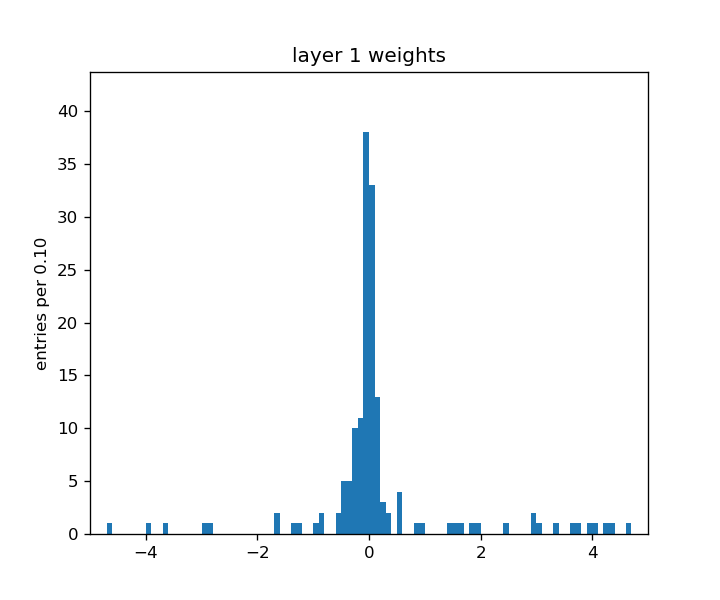

<IPython.core.display.Javascript object>


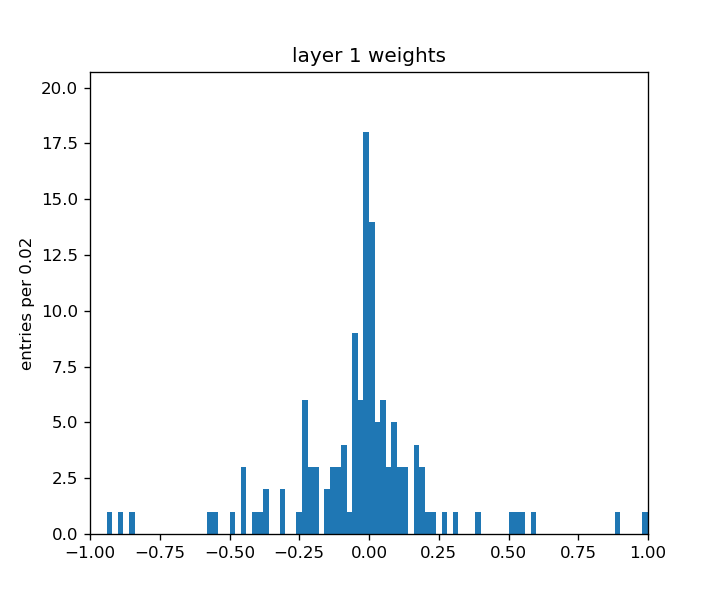

<IPython.core.display.Javascript object>


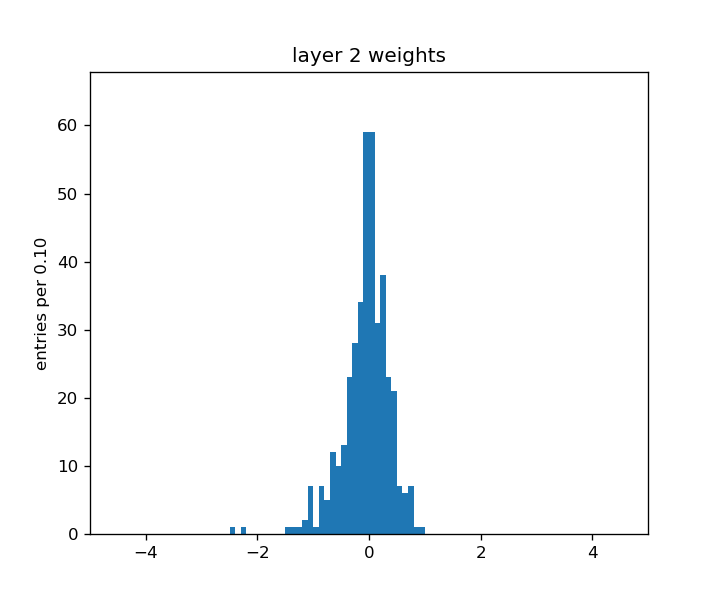

<IPython.core.display.Javascript object>


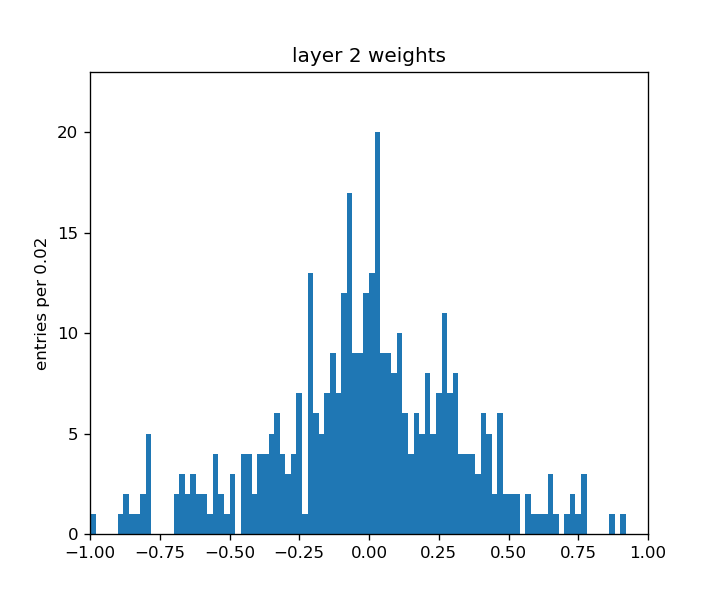

<IPython.core.display.Javascript object>


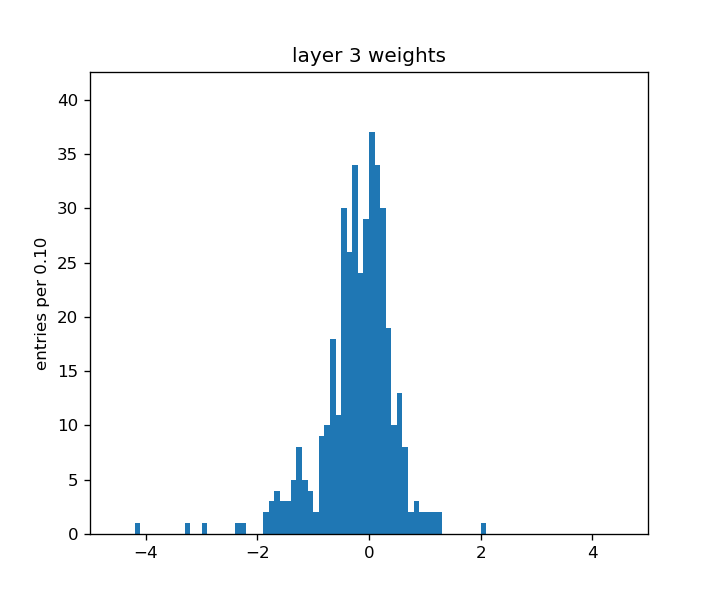

<IPython.core.display.Javascript object>


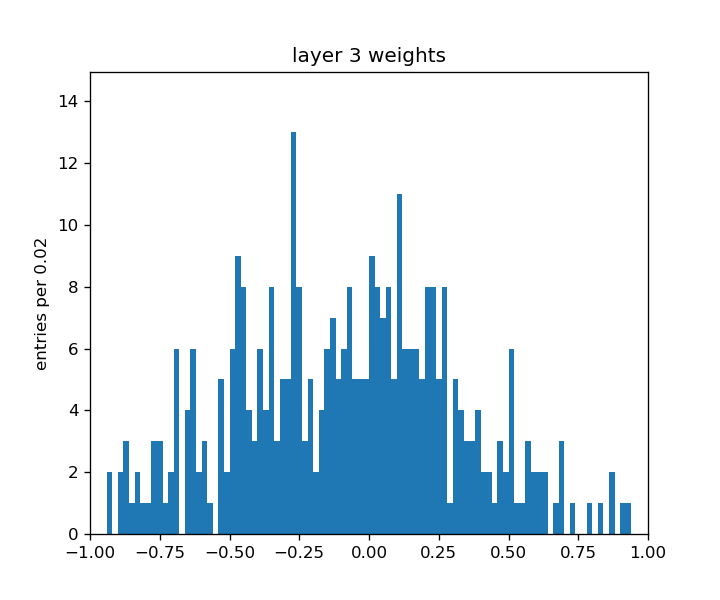

<IPython.core.display.Javascript object>


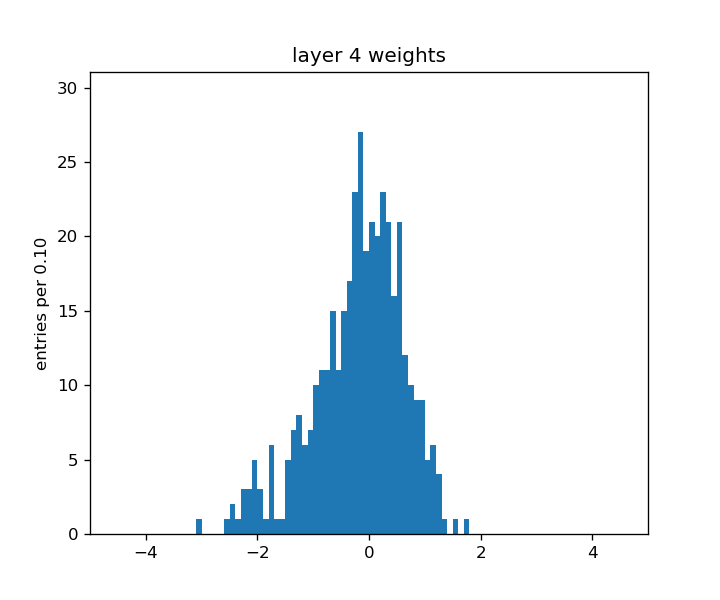

<IPython.core.display.Javascript object>


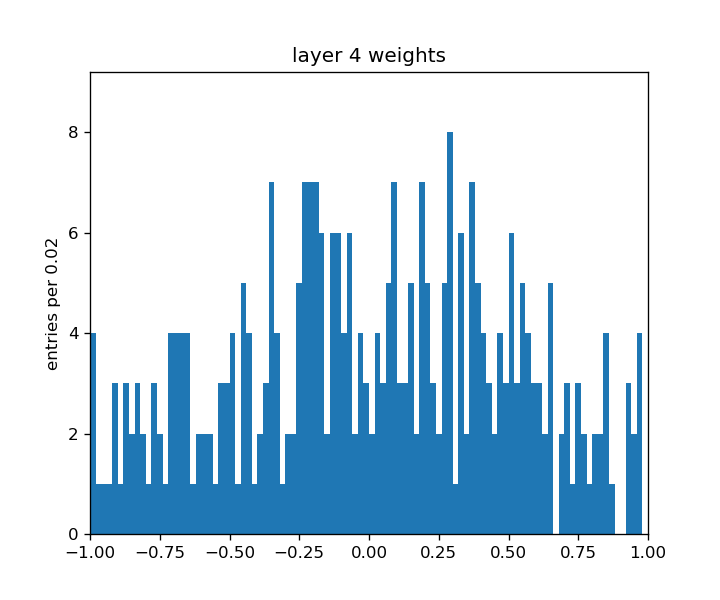

<IPython.core.display.Javascript object>


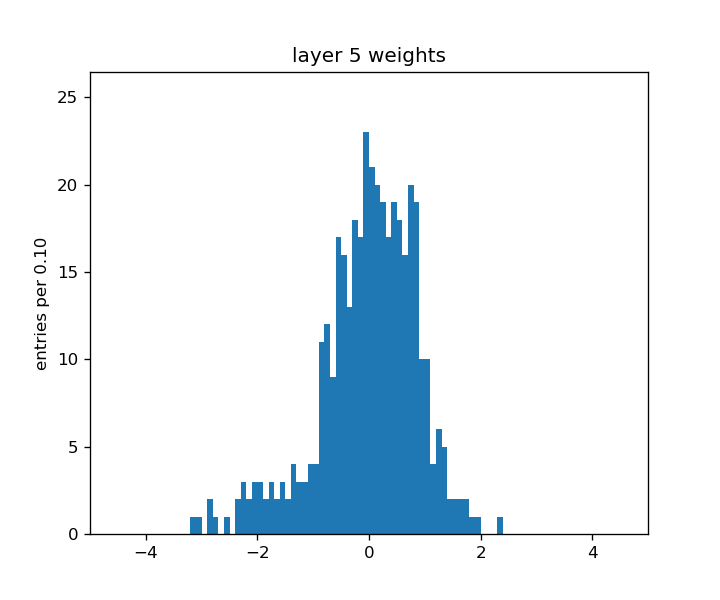

<IPython.core.display.Javascript object>


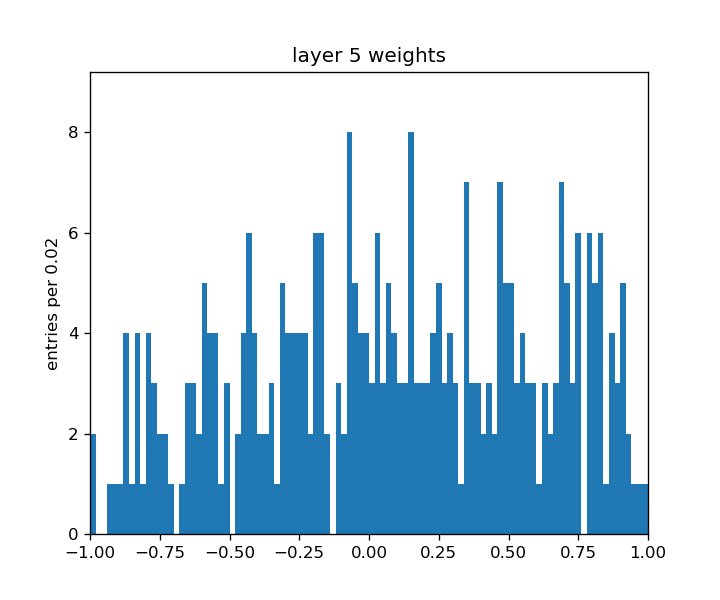

<IPython.core.display.Javascript object>


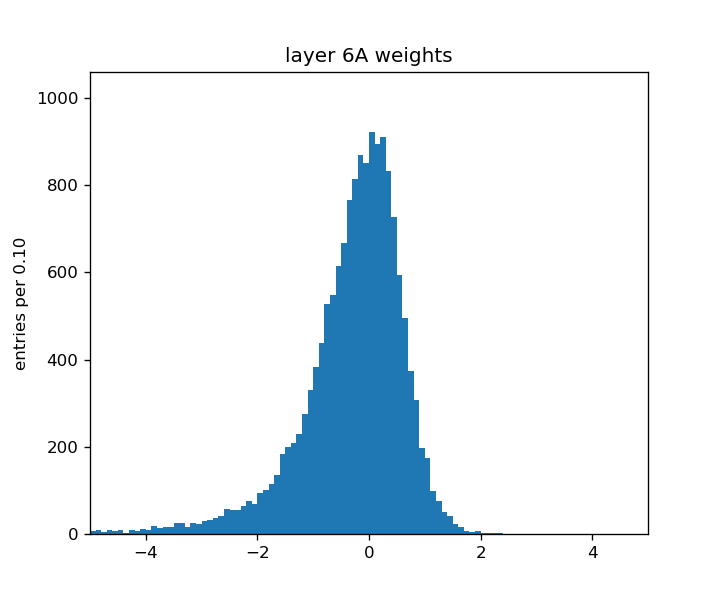

<IPython.core.display.Javascript object>


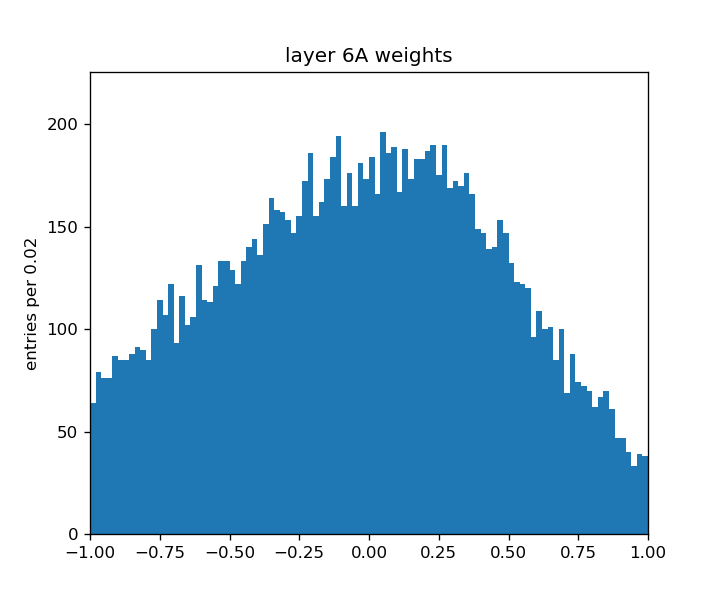

In [20]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


print('model = ',model)
print('model.layer1.weight.shape = ',model.layer1.weight.shape)
weights = model.layer1.weight.flatten()
weights = weights.cpu()
weights = weights.detach().numpy()


plt.figure()
plt.title('layer 1 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-5.,5.))
plt.ylabel('entries per 0.10')
plt.axis([-5.,5.,0.,1.15*max(nC)])
plt.show()


plt.figure()
plt.title('layer 1 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-1.,1.))
plt.ylabel('entries per 0.02')
plt.axis([-1.,1.,0.,1.15*max(nC)])
plt.show()

######## ---------

weights = model.layer2.weight.flatten()
weights = weights.cpu()
weights = weights.detach().numpy()


plt.figure()
plt.title('layer 2 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-5.,5.))
plt.ylabel('entries per 0.10')
plt.axis([-5.,5.,0.,1.15*max(nC)])
plt.show()


plt.figure()
plt.title('layer 2 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-1.,1.))
plt.ylabel('entries per 0.02')
plt.axis([-1.,1.,0.,1.15*max(nC)])
plt.show()

### ------------

weights = model.layer3.weight.flatten()
weights = weights.cpu()
weights = weights.detach().numpy()


plt.figure()
plt.title('layer 3 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-5.,5.))
plt.ylabel('entries per 0.10')
plt.axis([-5.,5.,0.,1.15*max(nC)])
plt.show()


plt.figure()
plt.title('layer 3 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-1.,1.))
plt.ylabel('entries per 0.02')
plt.axis([-1.,1.,0.,1.15*max(nC)])
plt.show()

######## ---------

weights = model.layer4.weight.flatten()
weights = weights.cpu()
weights = weights.detach().numpy()


plt.figure()
plt.title('layer 4 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-5.,5.))
plt.ylabel('entries per 0.10')
plt.axis([-5.,5.,0.,1.15*max(nC)])
plt.show()


plt.figure()
plt.title('layer 4 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-1.,1.))
plt.ylabel('entries per 0.02')
plt.axis([-1.,1.,0.,1.15*max(nC)])
plt.show()

############## !!!!!!!!!!!!


weights = model.layer5.weight.flatten()
weights = weights.cpu()
weights = weights.detach().numpy()


plt.figure()
plt.title('layer 5 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-5.,5.))
plt.ylabel('entries per 0.10')
plt.axis([-5.,5.,0.,1.15*max(nC)])
plt.show()


plt.figure()
plt.title('layer 5 weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-1.,1.))
plt.ylabel('entries per 0.02')
plt.axis([-1.,1.,0.,1.15*max(nC)])
plt.show()

######## ---------

weights = model.layer6A.weight.flatten()
weights = weights.cpu()
weights = weights.detach().numpy()


plt.figure()
plt.title('layer 6A weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-5.,5.))
plt.ylabel('entries per 0.10')
plt.axis([-5.,5.,0.,1.15*max(nC)])
plt.show()


plt.figure()
plt.title('layer 6A weights')
nC, bins, patches = plt.hist(weights,bins=100,range=(-1.,1.))
plt.ylabel('entries per 0.02')
plt.axis([-1.,1.,0.,1.15*max(nC)])
plt.show()




<IPython.core.display.Javascript object>


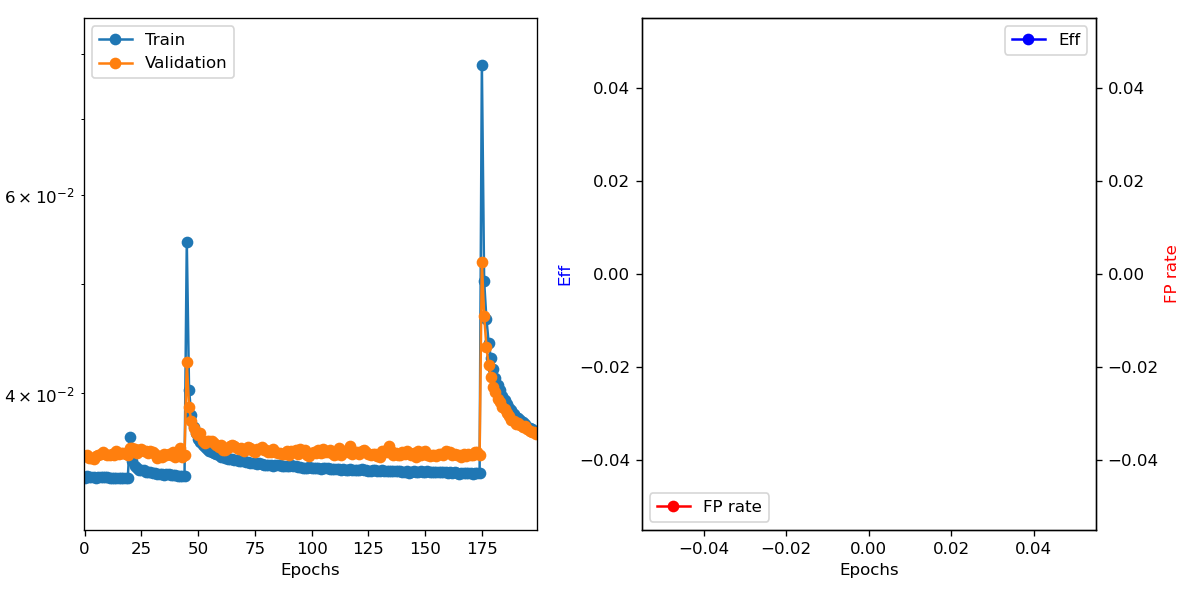

In [21]:
ax, tax, lax, lines = dual_train_plots()
fig = ax.figure
plt.tight_layout()

In [22]:
## train for 20 epochs before pruning to see the "baseline" costs;
## note that the learning rate here is 1e-4 while at the end of the
## previous training it was 2e-5 and 4e-6 (the decrease made epsilon difference)

for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        20, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')

Number of batches: train = 8024, val = 1768
Number of batches: train = 8024, val = 1768
Epoch 0: train=0.0336927, val=0.035185, took 141.16 s
Epoch 1: train=0.0337644, val=0.035243, took 134.32 s
Epoch 2: train=0.0337367, val=0.035033, took 132.67 s
Epoch 3: train=0.0337234, val=0.035099, took 131.19 s
Epoch 4: train=0.0337049, val=0.0350241, took 128.17 s
Epoch 5: train=0.0336912, val=0.035228, took 130.33 s
Epoch 6: train=0.0337448, val=0.0352898, took 128.04 s
Epoch 7: train=0.0337189, val=0.0353491, took 129.66 s
Epoch 8: train=0.033708, val=0.0354832, took 128.96 s
Epoch 9: train=0.0337126, val=0.0353323, took 129.3 s
Epoch 10: train=0.0336971, val=0.0352556, took 128.66 s
Epoch 11: train=0.0336891, val=0.0352914, took 133.43 s
Epoch 12: train=0.0336304, val=0.0353229, took 130.1 s
Epoch 13: train=0.033672, val=0.0352601, took 141.63 s
Epoch 14: train=0.0336606, val=0.0355596, took 141.98 s
Epoch 15: train=0.033645, val=0.0353691, took 145.57 s
Epoch 16: train=0.0336729, val=0.035

Go ahead and save the final model (even though it was also saved above):

<IPython.core.display.Javascript object>


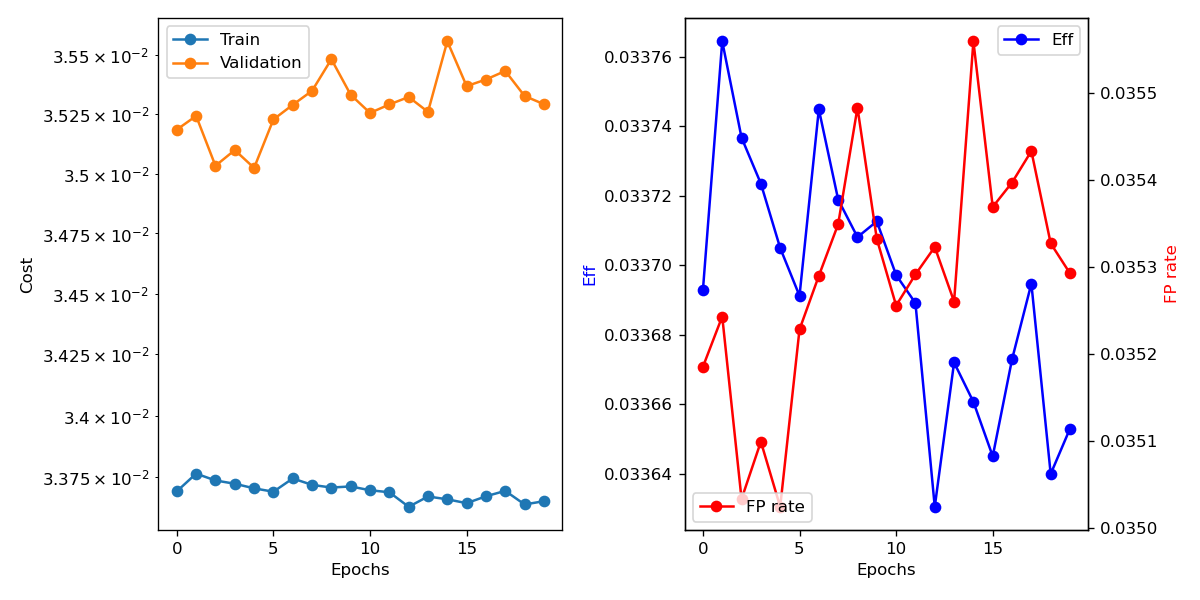

In [23]:
dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()
plt.savefig(str(output / f'{name}_stats_24.png'))

The training and validation costs here are lower than they were after the origina pruning  (or similar, in the case of the validation cost)

`RunModel_IntervalTracks_to_hists_08August2023_HDplusUNet100_pruning01_10epochs-1em4`

after removing 50% of the layer2, layer3, layer4, layer5, and layer6A weights


`
Epoch 295: train=0.0341653, val=0.0352384, took 132.22 s
Epoch 296: train=0.0341806, val=0.0353228, took 135.17 s
Epoch 297: train=0.0341487, val=0.0353233, took 136.4 s
Epoch 298: train=0.0342045, val=0.0354205, took 136.57 s
Epoch 299: train=0.0341702, val=0.0355003, took 132.52 s
`

so let's try pruning 20% here as our "starting point"

In [24]:
module = model.layer2
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer3
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer4
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer5
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer6A
prune.l1_unstructured(module, name="weight", amount=3200)

Linear(in_features=20, out_features=800, bias=True)

In [25]:
## trained for 20 epochs initially to get baseline; train for
## another 25 here, so 45 altogether

for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        45, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')

Number of batches: train = 8024, val = 1768
Number of batches: train = 8024, val = 1768
Epoch 20: train=0.0366319, val=0.0358219, took 140.46 s
Epoch 21: train=0.0348211, val=0.0357886, took 137.58 s
Epoch 22: train=0.0344732, val=0.0357134, took 135.57 s
Epoch 23: train=0.034335, val=0.0354309, took 137.3 s
Epoch 24: train=0.0342401, val=0.0356262, took 131.27 s
Epoch 25: train=0.0341841, val=0.0356823, took 134.37 s
Epoch 26: train=0.0341845, val=0.0356023, took 134.3 s
Epoch 27: train=0.0340846, val=0.0355319, took 137.56 s
Epoch 28: train=0.0340586, val=0.035428, took 131.85 s
Epoch 29: train=0.0340561, val=0.0355397, took 128.81 s
Epoch 30: train=0.0340107, val=0.0354891, took 133.73 s
Epoch 31: train=0.0340109, val=0.0353539, took 130.57 s
Epoch 32: train=0.0339634, val=0.0350785, took 133.5 s
Epoch 33: train=0.0339222, val=0.0351875, took 132.54 s
Epoch 34: train=0.0339435, val=0.035118, took 134.13 s
Epoch 35: train=0.033864, val=0.0353601, took 137.36 s
Epoch 36: train=0.03390

<IPython.core.display.Javascript object>


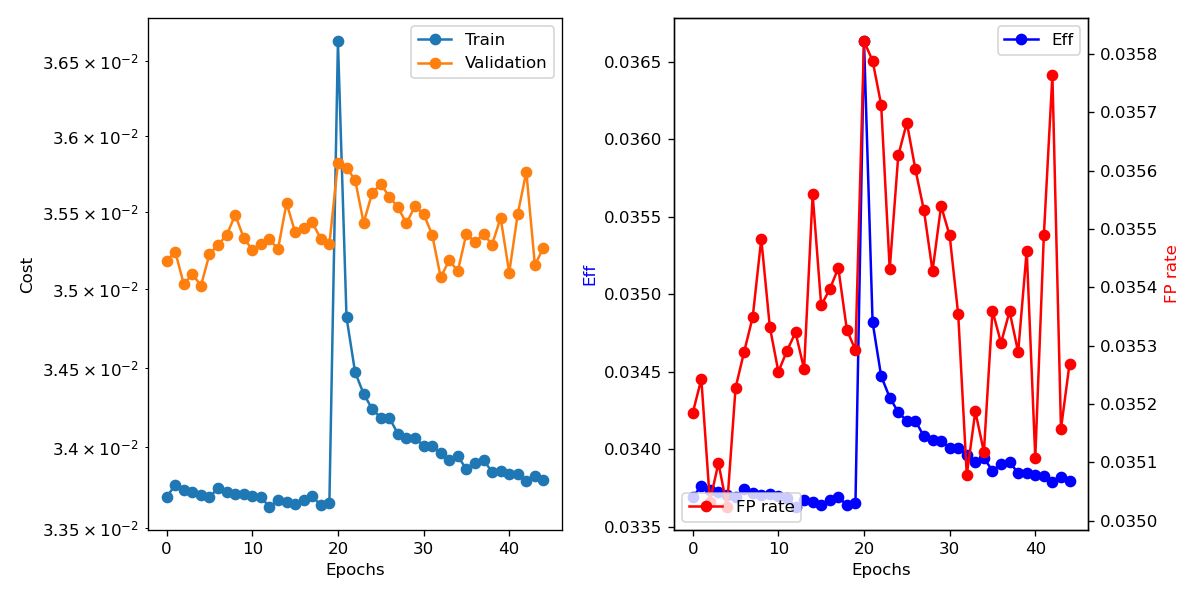

In [26]:
torch.save(model.state_dict(), output / f'{name}_final.pyt')

## Save the output results:

results.to_hdf(f'{name}_stats.hdf5', 'results')

dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()
plt.savefig(str(output / f'{name}_stats_44.png'))

Let's prune another 20% of the FC weights and then re-train for another 30 epochs

In [27]:
## prune another 20% of the FC weights

module = model.layer2
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer3
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer4
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer5
prune.l1_unstructured(module, name="weight", amount=80)

module = model.layer6A
prune.l1_unstructured(module, name="weight", amount=3200)


Linear(in_features=20, out_features=800, bias=True)

In [28]:
## trained for 45 epochs so far
## add another 30 epochs here
for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        75, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')

Number of batches: train = 8024, val = 1768
Number of batches: train = 8024, val = 1768
Epoch 45: train=0.0545018, val=0.0426777, took 138.09 s
Epoch 46: train=0.0402718, val=0.0388913, took 135.98 s
Epoch 47: train=0.0382551, val=0.0378398, took 139.32 s
Epoch 48: train=0.0373621, val=0.0373149, took 135.4 s
Epoch 49: train=0.0368915, val=0.03688, took 131.76 s
Epoch 50: train=0.0364714, val=0.0367455, took 134.72 s
Epoch 51: train=0.036232, val=0.0368846, took 136.27 s
Epoch 52: train=0.0360411, val=0.0363141, took 133.33 s
Epoch 53: train=0.0358521, val=0.0361443, took 139.47 s
Epoch 54: train=0.0357063, val=0.0362657, took 136.72 s
Epoch 55: train=0.0355378, val=0.0362644, took 135.23 s
Epoch 56: train=0.0354813, val=0.0362899, took 134.84 s
Epoch 57: train=0.0354554, val=0.0361416, took 140.81 s
Epoch 58: train=0.0353248, val=0.0360185, took 133.83 s
Epoch 59: train=0.0352698, val=0.0358246, took 134.36 s
Epoch 60: train=0.0351477, val=0.0360226, took 138.4 s
Epoch 61: train=0.035

<IPython.core.display.Javascript object>


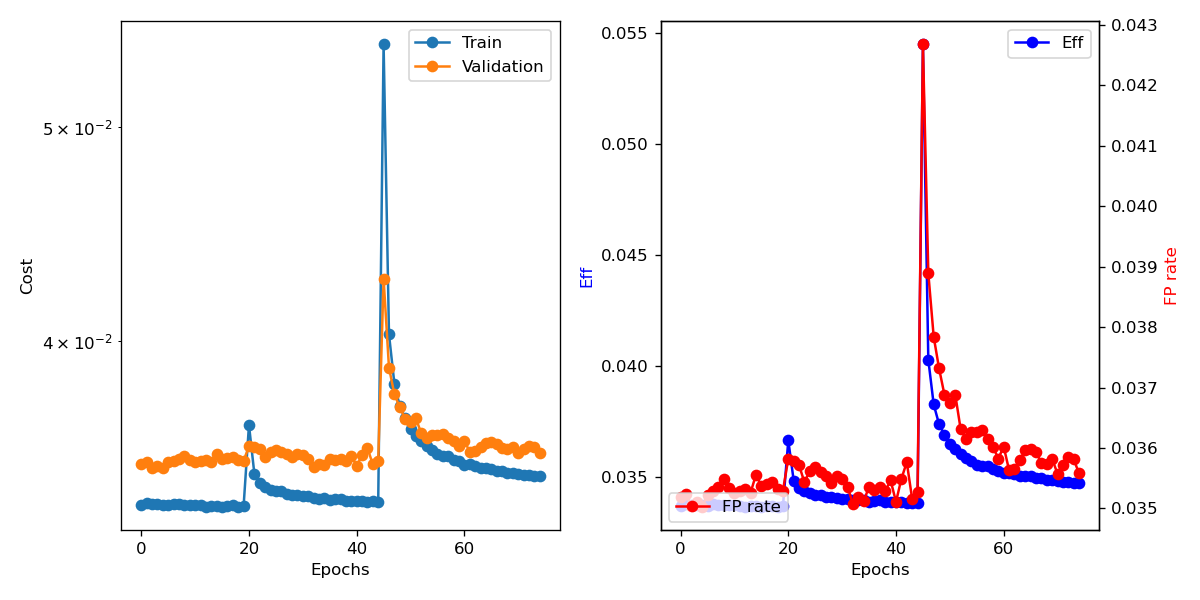

In [29]:
torch.save(model.state_dict(), output / f'{name}_final.pyt')

## Save the output results:

results.to_hdf(f'{name}_stats.hdf5', 'results')

dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()

plt.savefig(str(output / f'{name}_stats_74.png'))

The learning has not fuly recovered from this "perturbation", so let's continue learning "as is" for another 100 epochs.

In [30]:
## trained for 75 epochs so far
## add another 100 epochs here, no additional pruning, no modification of learning rate
for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        175, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')

Number of batches: train = 8024, val = 1768
Number of batches: train = 8024, val = 1768
Epoch 75: train=0.0347346, val=0.0354975, took 141.71 s
Epoch 76: train=0.0346636, val=0.0356799, took 134.79 s
Epoch 77: train=0.0346937, val=0.0356937, took 137.16 s
Epoch 78: train=0.0346412, val=0.0358268, took 137.8 s
Epoch 79: train=0.0345945, val=0.0356422, took 142.6 s
Epoch 80: train=0.034586, val=0.0356504, took 137.87 s
Epoch 81: train=0.034593, val=0.0354748, took 142.37 s
Epoch 82: train=0.0345521, val=0.0354731, took 139.45 s
Epoch 83: train=0.0345255, val=0.0356837, took 140.0 s
Epoch 84: train=0.0345786, val=0.0355147, took 141.61 s
Epoch 85: train=0.0345375, val=0.0354278, took 137.95 s
Epoch 86: train=0.0345351, val=0.0354052, took 139.32 s
Epoch 87: train=0.0345298, val=0.0353617, took 137.63 s
Epoch 88: train=0.0345142, val=0.0353777, took 135.6 s
Epoch 89: train=0.0344954, val=0.0355533, took 136.07 s
Epoch 90: train=0.0344805, val=0.0353094, took 138.05 s
Epoch 91: train=0.0345

<IPython.core.display.Javascript object>


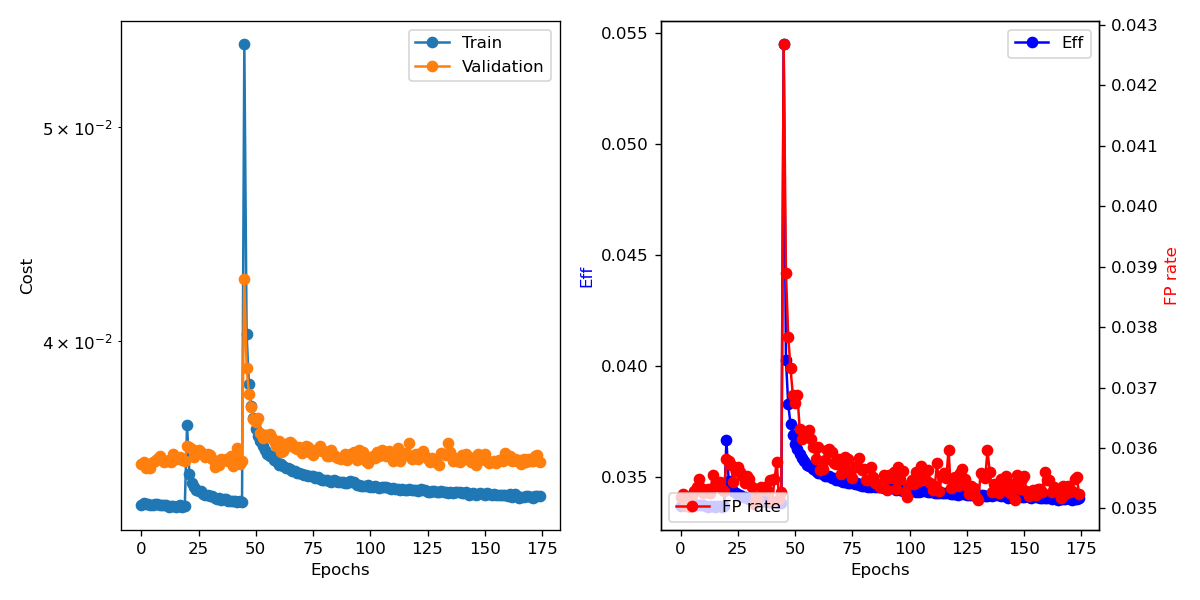

In [31]:
torch.save(model.state_dict(), output / f'{name}_final.pyt')

## Save the output results:

results.to_hdf(f'{name}_stats.hdf5', 'results')

dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()

plt.savefig(str(output / f'{name}_stats_74.png'))

interesting results; the training cost is a bit lower than what was observed when 25% of the FC weights were pruned by 

`
RunModel_IntervalTracks_to_hists_08August2023_HDplusUNet100_pruning01_10epochs-1em4
`

and the validation cost just a bit higher:

`
Epoch 295: train=0.0341653, val=0.0352384, took 132.22 s
Epoch 296: train=0.0341806, val=0.0353228, took 135.17 s
Epoch 297: train=0.0341487, val=0.0353233, took 136.4 s
Epoch 298: train=0.0342045, val=0.0354205, took 136.57 s
Epoch 299: train=0.0341702, val=0.0355003, took 132.52 s
`

And here we have pruned 40% of the FC weights already. Let's prune another 10% now to make 50% and re-train for 300 epochs with learning_rate = 2e-5 rather than 1e-4

In [32]:
learning_rate = 2e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
## prune another 10% of the FC weights

module = model.layer2
prune.l1_unstructured(module, name="weight", amount=40)

module = model.layer3
prune.l1_unstructured(module, name="weight", amount=40)

module = model.layer4
prune.l1_unstructured(module, name="weight", amount=40)

module = model.layer5
prune.l1_unstructured(module, name="weight", amount=40)

module = model.layer6A
prune.l1_unstructured(module, name="weight", amount=1600)


Linear(in_features=20, out_features=800, bias=True)

In [34]:
## trained to epoch 175 so far;  add 300 epochs after pruning another 10%

for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        475, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')
  

Number of batches: train = 8024, val = 1768
Number of batches: train = 8024, val = 1768
Epoch 175: train=0.0782463, val=0.0523334, took 140.65 s
Epoch 176: train=0.0503008, val=0.0468751, took 141.13 s
Epoch 177: train=0.0465912, val=0.0440228, took 146.02 s
Epoch 178: train=0.0443466, val=0.0423959, took 144.89 s
Epoch 179: train=0.0429904, val=0.0414022, took 141.23 s
Epoch 180: train=0.0420194, val=0.0405549, took 136.43 s
Epoch 181: train=0.0413223, val=0.040087, took 144.96 s
Epoch 182: train=0.0407172, val=0.039583, took 140.25 s
Epoch 183: train=0.0402994, val=0.0393279, took 136.09 s
Epoch 184: train=0.039815, val=0.0388717, took 144.22 s
Epoch 185: train=0.039493, val=0.0387413, took 133.65 s
Epoch 186: train=0.0391579, val=0.0383992, took 136.54 s
Epoch 187: train=0.0388613, val=0.0381659, took 133.99 s
Epoch 188: train=0.0386607, val=0.0379207, took 141.23 s
Epoch 189: train=0.0383916, val=0.0378003, took 282.26 s
Epoch 190: train=0.0381618, val=0.037618, took 283.72 s
Epoch

Oops.  Looks like I killed the cell above circa Epoch 199.
Let's do an experiment to see if I can execute something trivial in the cell below.

In [1]:
1+1

2

Hmmm.  The cell number above is [1], so it looks like the job was killed.

The last weights file that was saved is

`04Sept2023_t2hists_HDplusUNet100_pruning00_199.pyt`

which will have weights_orig and weights_mask rather than weights.  Figure out how to continue

In [ ]:
torch.save(model.state_dict(), output / f'{name}_final.pyt')

## Save the output results:

results.to_hdf(f'{name}_stats.hdf5', 'results')

dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()

plt.savefig(str(output / f'{name}_stats_374.png'))

In [ ]:
## prune another 5% (third round, for a total of 15%)

module = model.layer2
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer3
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer4
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer5
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer6A
prune.l1_unstructured(module, name="weight", amount=800)




In [ ]:
## trained for 5 epochs initially to get baseline; then another 25 for first pruning; 
## plus another 25 for second pruning; that gets us to 55, so go for 100 here 
## (following third pruning) as I have a haircut appointment -- results should be
## ready about the time I return; the extra epochs will allow us to judge whether 
## the training cost is continuing to drop

for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        100, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')

In [ ]:
torch.save(model.state_dict(), output / f'{name}_final.pyt')

## Save the output results:

results.to_hdf(f'{name}_stats.hdf5', 'results')

dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()

In [ ]:
## prune another 5% (fourth round, for a total of 20%)

module = model.layer2
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer3
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer4
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer5
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer6A
prune.l1_unstructured(module, name="weight", amount=800)




In [ ]:
## trained for 5 epochs initially to get baseline; then another 25 for first pruning; 
## plus another 25 for second pruning; another 45 for the third pruning;
## that gets us to 100, so go for 200 here 
## (following fourth pruning)

for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        200, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')

In [ ]:
torch.save(model.state_dict(), output / f'{name}_final.pyt')

## Save the output results:

results.to_hdf(f'{name}_stats.hdf5', 'results')

dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()

In [ ]:
## prune another 5% (fifth round, for a total of 25%)

module = model.layer2
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer3
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer4
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer5
prune.l1_unstructured(module, name="weight", amount=20)

module = model.layer6A
prune.l1_unstructured(module, name="weight", amount=800)




In [ ]:
## trained for 5 epochs initially to get baseline; then another 25 for first pruning; 
## plus another 25 for second pruning; another 45 for the third pruning;
## that gets us to 100, plus 100 after fourth pruning.  And an extra 100 here 
## (following fifth pruning)

for result in trainNet(model, optimizer, loss,
                        train_loader, val_loader,
                        300, epoch_start=len(results),
                        notebook=True):
    
    results = results.append(pd.Series(result._asdict()), ignore_index=True)
    xs = results.index
    
    # Update the plot above
    lines['train'].set_data(results.index,results.cost)
    lines['val'].set_data(results.index,results.val)
    
    #filter first cost epoch (can be really large)
    max_cost = max(max(results.cost if len(results.cost)<2 else results.cost[1:]), max(results.val))
    min_cost = min(min(results.cost), min(results.val))
    
    # The plot limits need updating too
    
    
    
    ax.set_ylim(min_cost*.9, max_cost*1.1)  
    ax.set_xlim(-.5, len(results.cost) - .5)

    
    # Redraw the figure
    fig.canvas.draw()

    # Save each model state dictionary
    torch.save(model.state_dict(), output / f'{name}_{result.epoch}.pyt')

In [ ]:
torch.save(model.state_dict(), output / f'{name}_final.pyt')

## Save the output results:

results.to_hdf(f'{name}_stats.hdf5', 'results')

dual_train_plots(results.index,
                 results.cost, results.val,
                 results.cost, results.val)
plt.tight_layout()

In [ ]:
## prune.remove replaces model.layerN.weight with the pruned weights
## this code should save all the prunings so far;
## in the next cell we will save the weights.

for index, module in enumerate([ model.layer2, model.layer3,  model.layer4, model.layer5, model.layer6A]):
    plt.figure()
    plt.title('layer '+str(index+2)+' weights')
    weights = module.weight.flatten()
    weights = weights.cpu()
    weights = weights.detach().numpy()
    nC, bins, patches = plt.hist(weights,bins=100,range=(-2.,2.))
    plt.ylabel('entries per 0.02')
    plt.axis([-2.,2.,0.,1.15*max(nC)])
    plt.show()
    prune.remove(module, 'weight')
    

In [ ]:
torch.save(model.state_dict(), output / f'{name}_299_pruned.pyt')

In [ ]:
##print('model = ',model)
print(' -------- ')
print('model.rcbn1 = ',model.rcbn1)
print(' ')
print(' -----***-------')
print(' ')

for child in model.rcbn1.children():
  print(' child = ', child)
  

print(' ')
print(' -----*********-------')
print(' ')
for k,m in model.rcbn1.named_modules():
    print("k,m = ",k,m)
print('')
##weights = model.rcbn1.weight.flatten()
##weights = weights.cpu()
##weights = weights.detach().numpy()

In [ ]:
print(model.rcbn1[0])
print('       ')
print('   ------  ')
print("model.rcbn1[0].weight.shape = ",model.rcbn1[0].weight.shape)
print(model.rcbn1[0].weight.data)

In [ ]:
quit()
